In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

sns.set_style("whitegrid")

In [3]:
df  = pd.read_csv("../Datasets/insurance_lr.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


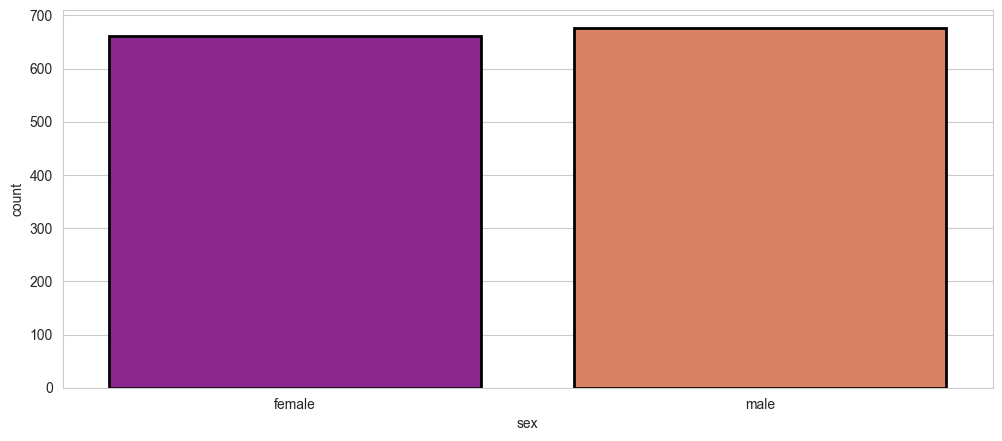

In [5]:
plt.figure(figsize=(12, 5), dpi=100)
sns.countplot(x=df['sex'], palette="plasma", edgecolor="black", lw=2);

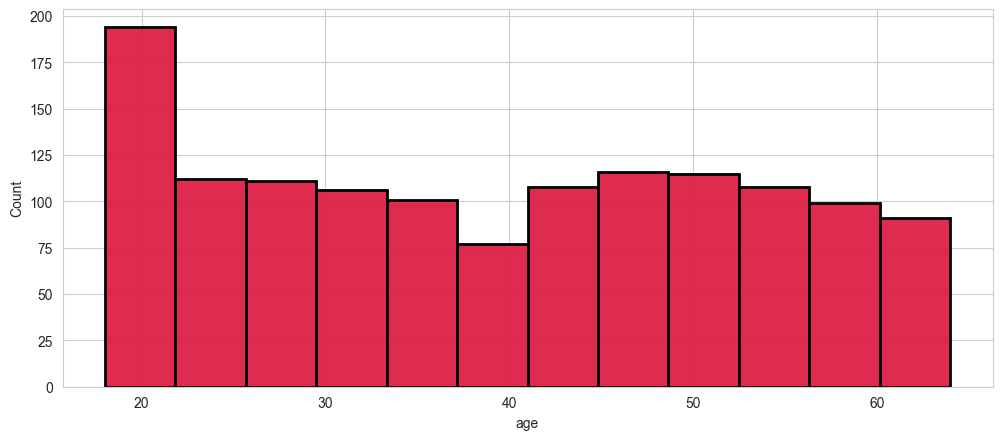

In [6]:
plt.figure(figsize=(12, 5), dpi=100)
sns.histplot(x=df['age'], color="crimson", edgecolor="black", lw=2, alpha=0.90);

In [7]:
print("Difference between Male and Female population in the Dataset:", df['sex'].value_counts()[0]-df['sex'].value_counts()[-1])

Difference between Male and Female population in the Dataset: 14


In [8]:
round(df['age'].mean())

39

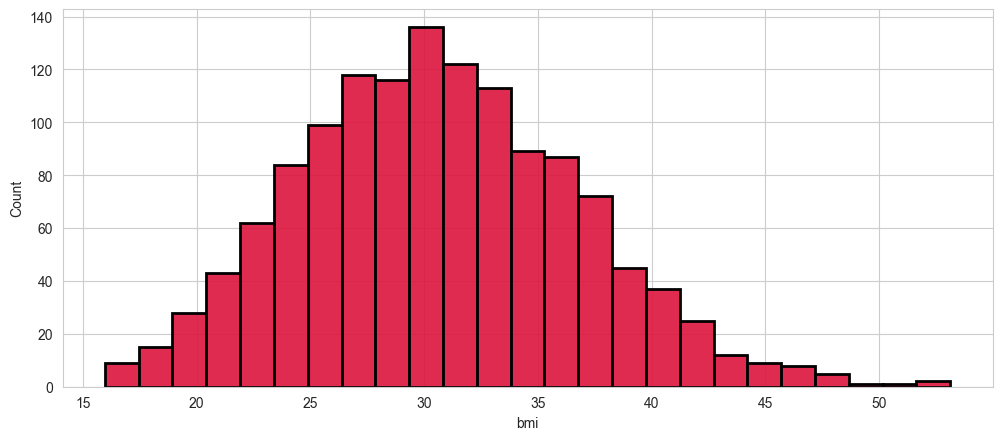

In [9]:
plt.figure(figsize=(12, 5), dpi=100)
sns.histplot(x=df['bmi'], color="crimson", edgecolor="black", lw=2, alpha=0.90); # Normal Distribution

In [10]:
df['bmi'].mean()

30.66339686098655

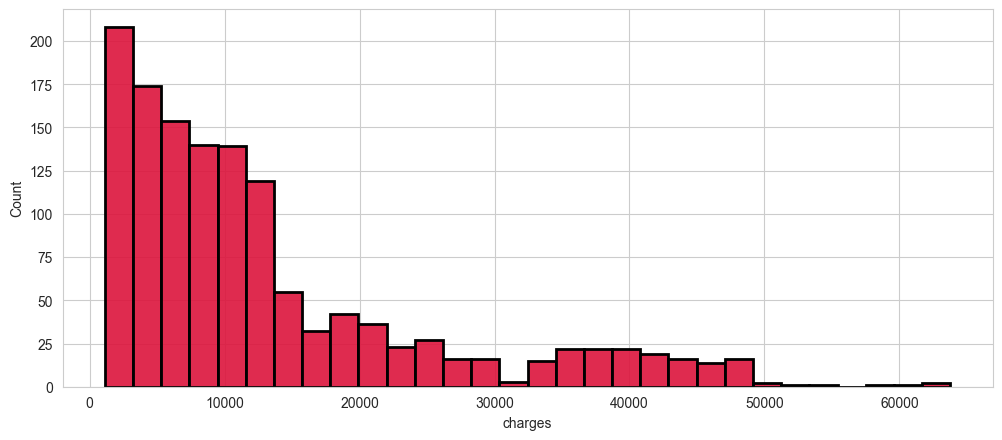

In [11]:
plt.figure(figsize=(12, 5), dpi=100)
sns.histplot(x=df['charges'], color="crimson", edgecolor="black", lw=2, alpha=0.90); # 100 - 10k

In [12]:
df['charges'].mean()

13270.422265141257

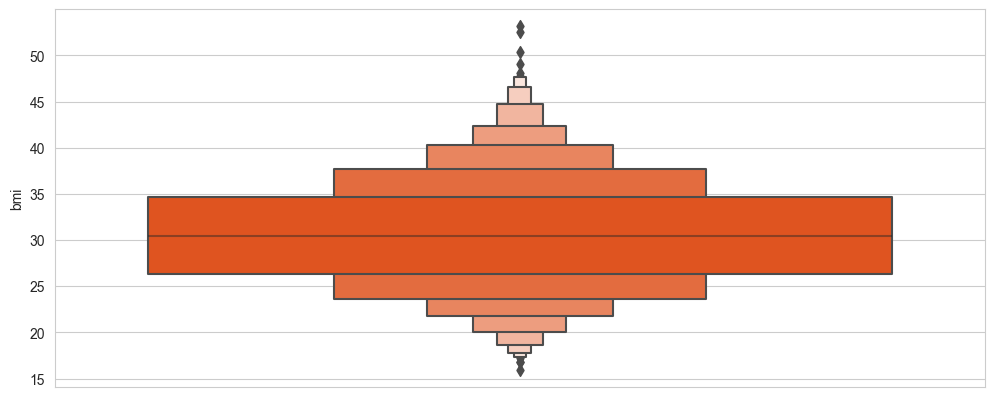

In [13]:
plt.figure(figsize=(12, 5), dpi=100)
sns.boxenplot(y=df['bmi'], color="orangered"); # Clear the outliers

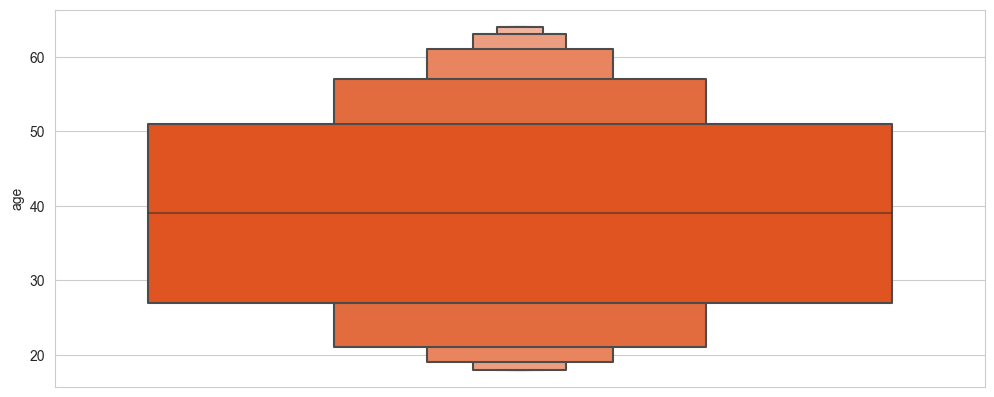

In [14]:
plt.figure(figsize=(12, 5), dpi=100)
sns.boxenplot(y=df['age'], color="orangered"); # No outliers

In [15]:
df.corrwith(df["charges"]).sort_values(ascending=False)[1:]

age         0.299008
bmi         0.198341
children    0.067998
dtype: float64

In [16]:
df['sex'] = df['sex'].apply(lambda x: 1 if x.lower()=="female" else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x=="yes" else 0)
df = pd.concat([df, pd.get_dummies(df['region'])], axis=1)
df.drop("region", axis=1, inplace=True)

In [17]:
df.head() # All numeric

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [18]:
df.corrwith(df["charges"]).sort_values(ascending=False)[1:]

smoker       0.787251
age          0.299008
bmi          0.198341
southeast    0.073982
children     0.067998
northeast    0.006349
northwest   -0.039905
southwest   -0.043210
sex         -0.057292
dtype: float64

<AxesSubplot:>

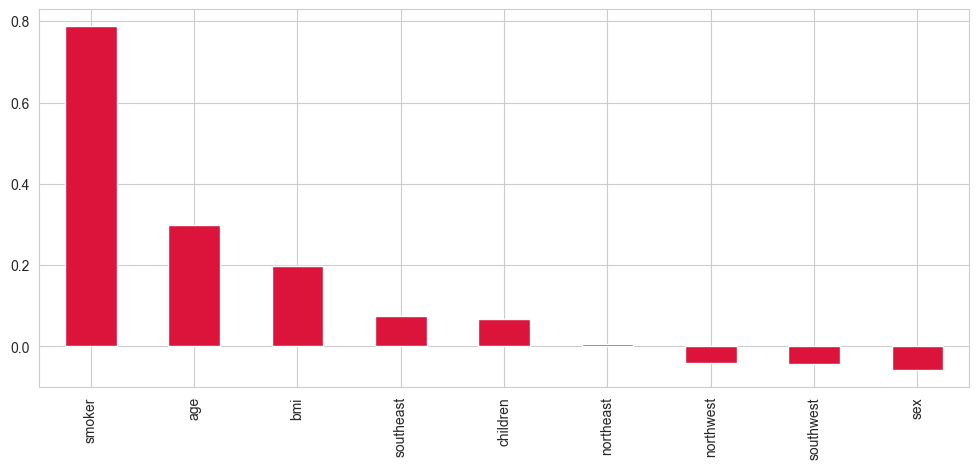

In [19]:
plt.figure(figsize=(12, 5), dpi=100)
df.corrwith(df["charges"]).sort_values(ascending=False)[1:].plot(kind="bar", color='crimson')

In [20]:
df.isnull().sum() # SWEET

age          0
sex          0
bmi          0
children     0
smoker       0
charges      0
northeast    0
northwest    0
southeast    0
southwest    0
dtype: int64

<AxesSubplot:xlabel='charges', ylabel='age'>

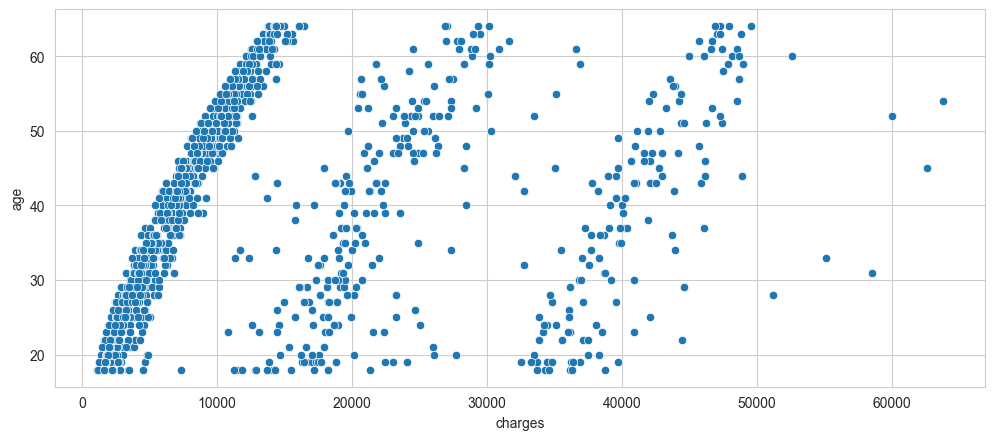

In [21]:
plt.figure(figsize=(12, 5), dpi=100)
sns.scatterplot(x=df['charges'], y=df['age']) # some sort of postive corr

<AxesSubplot:xlabel='charges', ylabel='smoker'>

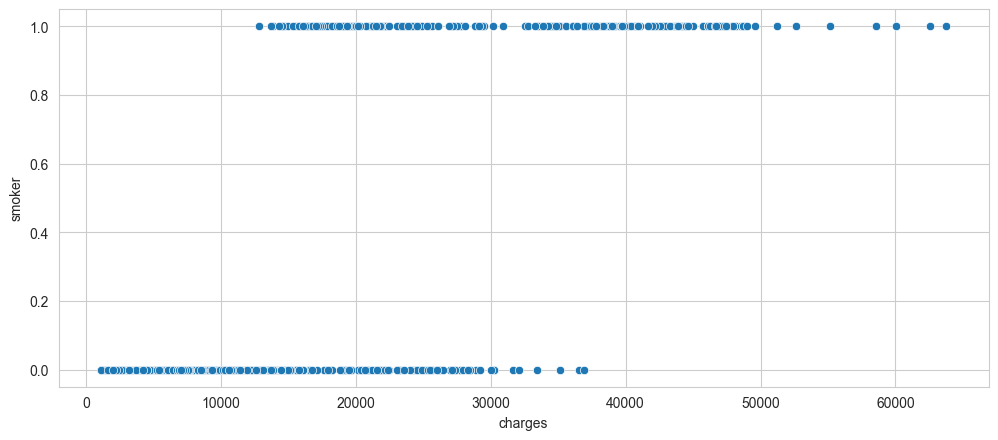

In [22]:
plt.figure(figsize=(12, 5), dpi=100)
sns.scatterplot(x=df['charges'], y=df['smoker']) # some sort of postive corr

In [23]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X, y = df.drop("charges", axis=1), df["charges"]

In [27]:
X.shape

(1338, 9)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model = ElasticNet()

In [31]:
params = {"alpha":[0.1, 0.5, 1, 3, 5, 10, 15, 20, 100],
         "l1_ratio":[0.1, 0.3, 0.5, 0.6, 0.6, 0.8, 0.95, 1],
         "max_iter":[1000000],
         "normalize":[True, False],
         "fit_intercept":[True, False],
         "random_state":[42, 101]}

In [32]:
grid_search = GridSearchCV(model, params, scoring="explained_variance", cv=10, verbose=1)

In [33]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 1, 3, 5, 10, 15, 20, 100],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.6, 0.6, 0.8, 0.95, 1],
                         'max_iter': [1000000], 'normalize': [True, False],
                         'random_state': [42, 101]},
             scoring='explained_variance', verbose=1)

In [34]:
abs(grid_search.best_score_)

0.7270276343656366

In [35]:
grid_search.best_estimator_

ElasticNet(alpha=5, l1_ratio=1, max_iter=1000000, normalize=True,
           random_state=42)

In [36]:
model = ElasticNet(alpha=5, l1_ratio=1, max_iter=1000000, normalize=True,
                   random_state=42)


In [37]:
cv = cross_validate(model, X, y, scoring=["neg_mean_squared_error", "explained_variance"], cv=10)

In [38]:
cv_df = pd.DataFrame(cv)

In [39]:
cv_df

,fit_time,score_time,test_neg_mean_squared_error,test_explained_variance
0,0.012960,0.004988,-3.586138e+07,0.785487
1,0.012966,0.006981,-3.835919e+07,0.733308
2,0.006981,0.003989,-3.662482e+07,0.740959
3,0.004987,0.004986,-3.842995e+07,0.676546
4,0.008975,0.012964,-3.990309e+07,0.764285
5,0.009974,0.003990,-2.690003e+07,0.788511
6,0.009974,0.009975,-3.148229e+07,0.789015
7,0.006984,0.003990,-4.810126e+07,0.672266
8,0.005987,0.011963,-3.314297e+07,0.744940
9,0.012966,0.005984,-4.205654e+07,0.760781


In [40]:
cv_df['test_mean_squared_error'] = abs((np.round(cv_df['test_neg_mean_squared_error'], 0)))

In [41]:
cv_df.drop("test_neg_mean_squared_error", axis=1, inplace=True)

In [42]:
cv_df

,fit_time,score_time,test_explained_variance,test_mean_squared_error
0,0.012960,0.004988,0.785487,35861377.0
1,0.012966,0.006981,0.733308,38359192.0
2,0.006981,0.003989,0.740959,36624817.0
3,0.004987,0.004986,0.676546,38429951.0
4,0.008975,0.012964,0.764285,39903090.0
5,0.009974,0.003990,0.788511,26900030.0
6,0.009974,0.009975,0.789015,31482288.0
7,0.006984,0.003990,0.672266,48101256.0
8,0.005987,0.011963,0.744940,33142972.0
9,0.012966,0.005984,0.760781,42056539.0


In [43]:
model.fit(X_train, y_train)

ElasticNet(alpha=5, l1_ratio=1, max_iter=1000000, normalize=True,
           random_state=42)

In [44]:
predictions = model.predict(X_test)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [46]:
mean_absolute_error(y_test, predictions)

4151.77279125327

In [47]:
np.sqrt(mean_squared_error(y_test, predictions))

5828.001225777713

In [48]:
explained_variance_score(y_test, predictions)

0.768591863153

In [49]:
final_model = ElasticNet(alpha=5, l1_ratio=1, max_iter=1000000, normalize=True,
                         random_state=42)
final_model.fit(X, y)
predictions = final_model.predict(X)
explained_variance_score(y, predictions)


0.7492761045450449

In [50]:
from joblib import dump

In [51]:
dump(model, '../Models/health_insurance_model.joblib');
dump(scaler, '../Models/health_insurance_scaler.joblib');

In [52]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [65]:
model.predict([[30, 0, 25.9, 0, 0, 0, 0, 0, 1]])/75

array([3201.58207475])